<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/Cox%20Proportional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd

In [35]:
path="/content/drive/MyDrive/Cox.csv"
df= pd.read_csv(path)
df

,Time to Deliquency,LoanAmount,Tenure,InterestRate,CIBIL,NPA
0,14,500000,60,22.0,748,1
1,15,550000,60,20.0,761,1
2,13,800000,60,24.0,733,1
3,30,600000,60,22.0,711,1
4,20,400000,60,24.0,690,1
...,...,...,...,...,...,...
464,837,800000,84,21.0,769,0
465,833,700000,60,21.0,679,0
466,836,350000,48,21.0,-1,0
467,827,150000,60,21.0,751,0


In [36]:
!pip install lifelines

In [37]:
import pandas as pd
from lifelines import CoxPHFitter

In [38]:
duration_col = 'Time to Deliquency'  # Time until delinquency or censoring
event_col = 'NPA'  # Binary indicator (1 if delinquent, 0 if not)

# Fit Cox Proportional Hazard model
cph = CoxPHFitter()
cph.fit(df, duration_col=duration_col, event_col=event_col)

<lifelines.CoxPHFitter: fitted with 469 total observations, 271 right-censored observations>

                  coef  exp(coef)      se(coef)  coef lower 95%  \
covariate                                                         
LoanAmount    0.000001   1.000001  3.014908e-07    8.786177e-07   
Tenure        0.014191   1.014292  3.947980e-03    6.452611e-03   
InterestRate -0.040036   0.960754  6.865720e-02   -1.746021e-01   
CIBIL        -0.000783   0.999217  2.058067e-04   -1.186401e-03   

              coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%  \
covariate                                                                
LoanAmount          0.000002             1.000001             1.000002   
Tenure              0.021928             1.006473             1.022171   
InterestRate        0.094529             0.839791             1.099141   
CIBIL              -0.000380             0.998814             0.999620   

              cmp to         z         p   -log2(p)  
covariate                                            
LoanAmount       0.0  4.874208  0.000001  19

<Axes: xlabel='log(HR) (95% CI)'>

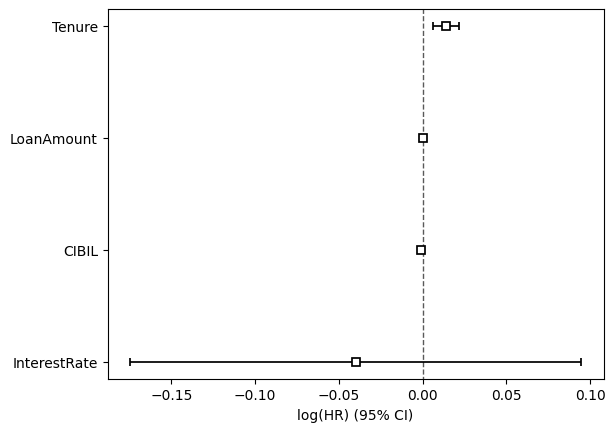

In [39]:
cph = CoxPHFitter()
cph.fit(df, duration_col=duration_col, event_col=event_col)

if 'summary' in locals() and isinstance(summary, pd.DataFrame):
    print("Warning: 'summary' is defined as a DataFrame. This might be causing issues.")
    # Consider renaming the DataFrame to avoid conflicts
    # For example:
    # df_summary = summary
    # del summary  # Delete the DataFrame variable

# Now try printing the summary again
print(cph.summary)
cph.plot()

In [40]:
!pip install numpy
from lifelines.utils import k_fold_cross_validation
import numpy as np # Import the NumPy library and alias it as 'np'

scores = k_fold_cross_validation(cph, df, duration_col=duration_col, event_col=event_col, k=5)
print('C-index:', np.mean(scores))

C-index: -1.6934686465964723


In [71]:
new_loan_data = pd.DataFrame({'LoanAmount': [1000000], 'InterestRate': [30], 'CIBIL': [700], 'Tenure': [48]})
predicted_survival = cph.predict_survival_function(new_loan_data)

# Check available time points in the index
print(predicted_survival.index)

# Access the predicted survival probability at an existing time point
# For example, let's try accessing the first time point
print(predicted_survival.iloc[27])

Index([   5.0,    6.0,    7.0,    8.0,    9.0,   10.0,   11.0,   12.0,   13.0,
         14.0,
       ...
       1219.0, 1240.0, 1259.0, 1280.0, 1312.0, 1339.0, 1344.0, 1350.0, 1360.0,
       1374.0],
      dtype='float64', length=185)
0    0.594673
Name: 36.0, dtype: float64
